In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gravity_problem(state):
    x, y, u, v = state
    dxdt = u
    dydt = v
    dudt = -x / (x**2 + y**2)
    dvdt = -y / (x**2 + y**2)
    return np.array([dxdt, dydt, dudt, dvdt])

In [3]:
def midpoint_rule_predictor_corrector(h, N):
    t_span = np.arange(0, 8 * np.pi, h)
    num_steps = len(t_span)

    # Initial conditions
    initial_state = np.array([1, 0, 0, 1])

    # Array to store solutions
    solution = np.zeros((num_steps, 4))
    solution[0] = initial_state

    for i in range(1, num_steps):
        t = t_span[i]
        # Forward Euler predictor
        predictor = solution[i - 1] + h * gravity_problem(solution[i - 1])

        # Midpoint rule corrector
        corrector = solution[i - 1] + 0.5 * h * (gravity_problem(solution[i - 1]) + gravity_problem(predictor))

        # Update solution
        solution[i] = corrector

    return t_span, solution

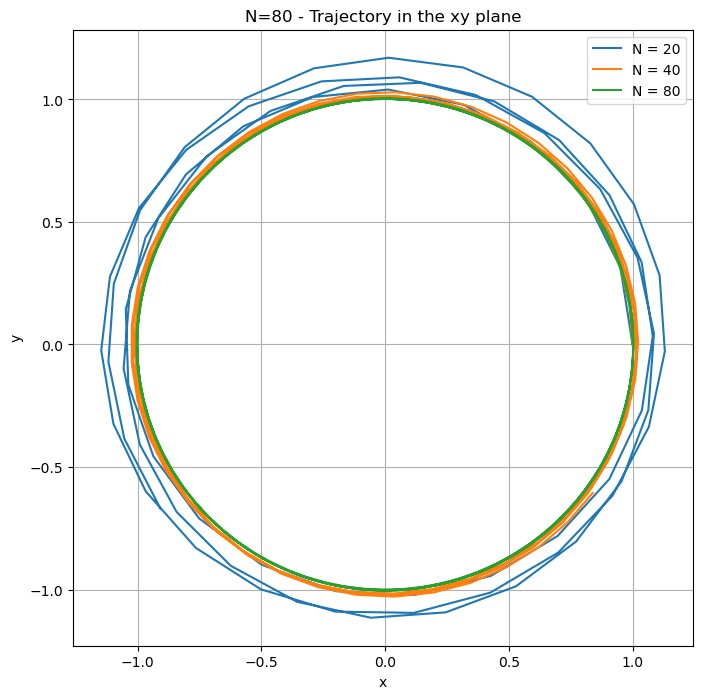

In [23]:
# Set N values
N_values = [20, 40, 80]

# Plot numerical solutions for different N values
plt.figure(figsize=(8, 8))

for N in N_values:
    h = 2 * np.pi / N
    t_span, solution = midpoint_rule_predictor_corrector(h, N)
    
#     plt.subplot(1, 2, 1)
#     plt.plot(t_span, solution[:, 0], label=f'N = {N}')
#     plt.title('Numerical Solutions using Midpoint Rule with Forward Euler Predictor')
#     plt.xlabel('Time')
#     plt.ylabel('x-coordinate')
#     plt.legend()
#     plt.grid()

#     plt.subplot(1, 2, 2)
    plt.plot(solution[:, 0], solution[:, 1], label=f'N = {N}')
    plt.title(f'N={N} - Trajectory in the xy plane')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()

plt.show()